In [1]:
import geopandas
import pandas as pd
#import geoplot
import os
import descartes
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import pyproj
import Instaplot as IP
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure

In [ ]:
from lxml import objectify


In [124]:
Parkings="""<td:PK_data Name="BODONI" ID="2" status="1" Total="468" Free="225" tendence="-1" lat="45.06355" lng="7.68357"/>
<td:PK_data Name="BOLZANO" ID="3" status="1" Total="858" Free="96" tendence="-1" lat="45.07248" lng="7.66716"/>
<td:PK_data Name="D'AZEGLIO GALILEI" ID="4" status="1" Total="229" Free="49" tendence="-1" lat="45.04289" lng="7.67754"/>
<td:PK_data Name="EMANUELE FILIBERTO" ID="5" status="1" Total="110" Free="35" tendence="-1" lat="45.07666" lng="7.68031"/>
<td:PK_data Name="GALILEO FERRARIS" ID="6" status="1" Total="305" Free="0" tendence="1" lat="45.06745" lng="7.67219"/>
<td:PK_data Name="LINGOTTO" ID="7" status="1" Total="3388" Free="3008" tendence="-1" lat="45.03162" lng="7.66268"/>
<td:PK_data Name="MADAMA CRISTINA" ID="8" status="1" Total="259" Free="85" tendence="-1" lat="45.05859" lng="7.68342"/>
<td:PK_data Name="NIZZA" ID="9" status="1" Total="375" Free="131" tendence="-1" lat="45.04085" lng="7.66890"/>
<td:PK_data Name="PALAGIUSTIZIA" ID="10" status="1" Total="480" Free="4" tendence="1" lat="45.06935" lng="7.66109"/>
<td:PK_data Name="PORTA PALAZZO" ID="11" status="1" Total="653" Free="234" tendence="-1" lat="45.07646" lng="7.68647"/>
<td:PK_data Name="CAIO MARIO" ID="23" status="1" Total="430" Free="343" tendence="-1" lat="45.02863" lng="7.64029"/>
<td:PK_data Name="RE UMBERTO" ID="13" status="1" Total="130" Free="1" tendence="1" lat="45.06700" lng="7.67583"/>
<td:PK_data Name="ROMA S.CARLO CASTELLO" ID="14" status="1" Total="802" Free="101" tendence="-1" lat="45.06399" lng="7.68037"/>
<td:PK_data Name="VENTIMIGLIA" ID="15" status="1" Total="114" Free="2" tendence="1" lat="45.03365" lng="7.67297"/>
<td:PK_data Name="FONTANESI" ID="16" status="1" Total="358" Free="85" tendence="-1" lat="45.07035" lng="7.70501"/>
<td:PK_data Name="RICHELMY" ID="49" status="1" Total="133" Free="74" tendence="1" lat="45.08307" lng="7.65769"/>
<td:PK_data Name="STATI UNITI" ID="19" status="1" Total="250" Free="186" tendence="1" lat="45.06406" lng="7.66700"/>
<td:PK_data Name="CAIO MARIO CAMPER" ID="50" status="1" Total="57" Free="55" tendence="1" lat="45.02803" lng="7.63973"/>
<td:PK_data Name="PORTA NUOVA FS" ID="51" status="1" Total="250" Free="146" tendence="-1" lat="45.06293" lng="7.67776"/>
<td:PK_data Name="MOLINETTE" ID="25" status="1" Total="546" Free="0" tendence="1" lat="45.03858" lng="7.67589"/>
<td:PK_data Name="SOFIA" ID="27" status="1" Total="280" Free="171" tendence="1" lat="45.09557" lng="7.71692"/>
<td:PK_data Name="STURA" ID="28" status="1" Total="600" Free="143" tendence="-1" lat="45.12058" lng="7.71156"/>
<td:PK_data Name="VITTORIO PARK" ID="30" status="1" Total="476" Free="244" tendence="-1" lat="45.06478" lng="7.69543"/>
<td:PK_data Name="PORTA SUSA" ID="52" status="1" Total="172" Free="48" tendence="1" lat="45.07301" lng="7.66718"/>
<td:PK_data Name="VALDO FUSI" ID="18" status="1" Total="440" Free="138" tendence="-1" lat="45.06504" lng="7.68761"/>
<td:PK_data Name="CTO" ID="32" status="1" Total="161" lat="45.03360" lng="7.67349"/>
<td:PK_data Name="SANTO STEFANO" ID="12" status="1" Total="344" Free="70" tendence="-1" lat="45.07384" lng="7.68372"/>
<td:PK_data Name="ANCONA" ID="53" status="1" Total="156" Free="12" tendence="-1" lat="45.07961" lng="7.69175"/>
<td:PK_data Name="PALESTRO" ID="54" status="1" Total="113" Free="16" tendence="-1" lat="45.07339" lng="7.67184"/>
<td:PK_data Name="CERNAIA" ID="55" status="1" Total="94" Free="64" tendence="-1" lat="45.06936" lng="7.67348"/>
<td:PK_data Name="MONTI" ID="56" status="1" Total="156" Free="59" tendence="1" lat="45.04709" lng="7.68091"/>
<td:PK_data Name="BACIGALUPO" ID="46" status="1" Total="332" Free="3" tendence="1" lat="45.03660" lng="7.67249"/>
<td:PK_data Name="VENCHI UNICA" ID="48" status="1" Total="449" Free="197" tendence="-1" lat="45.07410" lng="7.61576"/>"""

In [125]:
Parkings_latlng=[c for c in Parkings.split(' ') if 'lat' in c or 'lng' in c]

In [126]:
Parkings_coords=[]
while(Parkings_latlng):
    lat=''.join([char for char in Parkings_latlng.pop(0) if char.isdigit() or char=='.'])
    lng=''.join([char for char in Parkings_latlng.pop(0) if char.isdigit() or char=='.'])
    Parkings_coords.append((float(lng),float(lat)))

In [131]:
Parkings_coords=[Point(a) for a in Parkings_coords]

In [137]:
df_parkings=geopandas.GeoDataFrame(columns=['geometry'],data=Parkings_coords)

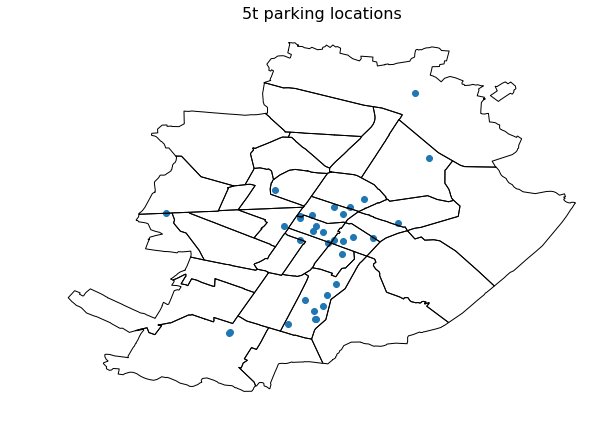

In [145]:
fig,ax=plt.subplots(figsize=(10,10))
df_parkings.plot(ax=ax)
df_cap.plot(ax=ax,color=(0,0,0,0),edgecolor='k')
plt.axis('off')
plt.title('5t parking locations',fontsize='16')
plt.savefig('5t_parking_locs.pdf')

(7.5680913419460865,
 7.7831607073445142,
 44.998891629168732,
 45.146915966888542)

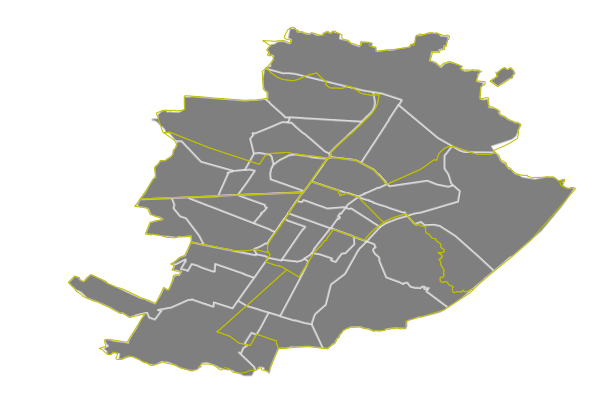

In [102]:
#From the highest to lowest granularity
#shp='carta_sintesi_geo'
#shp='sezioni_censimento_geo'
#shp='microzone_censuarie_geo'
#shp='zone_statistiche_geo'
#shp='distretti_assistenziali_geo'
#shp='circoscrizioni_geo'
shp='CAP_Torino'
df_cap=geopandas.read_file('SHP_files/{}/{}.shp'.format(shp,shp))
shp='circoscrizioni_geo'
df_cir=geopandas.read_file('SHP_files/{}/{}.shp'.format(shp,shp))
df_cir.crs={'init':'epsg:3003'}
fig,ax=plt.subplots(figsize=(10,10))
df_cap.plot(color='k',edgecolor='w',linewidth=2,alpha=.5,ax=ax)
df_cir.to_crs(epsg=4326).plot(color=(0,0,0,0),edgecolor='y',ax=ax)
plt.savefig('CAPvsCIRC.pdf')
plt.axis('off')

In [2]:
%matplotlib inline

In [3]:
import shapely
from shapely.geometry import Point

(7.568091341946085, 7.783160707344514, 45.00010226823592, 45.14685831740915)

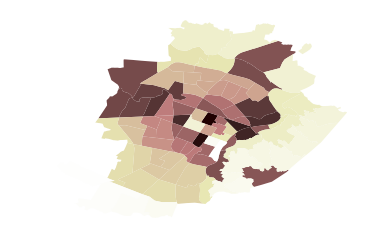

In [4]:
#The file we got from the TOrino website is in Gauss-Boaga projection. its EPSG code is 3003 but it does not know it.
df = geopandas.read_file('zone_statistiche_geo/zone_statistiche_geo.shx')
#We have to tell it:
df.crs={'init':'epsg:3003'}
#And then to plot it in the usual GPS coordinates.
df.to_crs(epsg=4326).plot(cmap='pink')#.to_crs({'proj': 'merc'}).plot()
plt.axis('off')

In [75]:
#path='todo/torinojazzfestival/'
#path='todo/art/contempart/'
#path='todo/art/streetart/'
#path='replot/tosend/'
path='Twitter_scraping/Results/2019-02-18_15_5000/'

In [76]:
os.listdir(path)

['read_me.txt', 'Heatmaps', 'pickle', 'TermVectors.txt', 't_series', 'matlab']

In [83]:
if not 'Heatmaps' in os.listdir(path):
    os.mkdir(path+'Heatmaps')
f=open(path+'TermVectors.txt', 'r')
tvectors=f.readlines()
f.close()
tvectors=['_'.join([t[2:-1] for t in tv[2:-2].split(',')][0:3]) for tv in tvectors][::-1]

In [84]:
for i in enumerate(tvectors):
    print(i)

(0, 'roma_im_latium')
(1, 'pavia_gorizia_trieste')
(2, 'giveaway_photography_pantano')
(3, 'im_foto_pubblicato')
(4, 'impact_hub_startup')
(5, 'quando_buongiorno_grazie')
(6, 'lt_pubblicato_foto')
(7, 'video_piaciuto_park')
(8, 'grazie_stampa_nr')
(9, 'parrot_palm_piemonte')
(10, "'favorited_mixcloud_loved")
(11, "'losfuso_beershop_cheers")
(12, "'posted_photo_automatically")
(13, "'video_piaciuto_doctor")
(14, "'ultime_novit\xc3\xa0_vini")


In [85]:
TV_toplot=[4]

In [87]:

A=pkl.load(open(path+'pickle/A.pkl', "rb"),encoding='latin1')
Grid=pkl.load(open(path+'pickle/Grid.pkl', "rb"))

topic1=pd.DataFrame(index=Grid)
for i in TV_toplot:
    data=list(A.T[i])
    Norm_factor=np.sqrt(sum([d**2 for d in data]))
    data=np.array([d/Norm_factor for d in data])
    data = np.ma.masked_where(data==0, data)
    topic1['data{}'.format(i)] = pd.Series(data, index=Grid)
    #topic1=pd.DataFrame({'data{}'.format(i):list(A.T[i])}, index=Grid)

#Our coordinates systems are transposed wrt what geopandas expect
Grid2=[(a[1],a[0]) for a in Grid]
#Encode points in a way that geopandas understands
points=pd.Series([Point(a) for a in Grid2],index=Grid)
topic1['points']=points
#Our coordinates are in the usual WGS84 encoding (i.e. EPSG: 4326).
TOP1 = geopandas.GeoDataFrame(topic1, geometry=points)
TOP1.crs = {'init': 'epsg:4326', 'no_defs': True}
#TOP1.plot()

TypeError: load() got an unexpected keyword argument 'encoding'

0.000590892202962 0.500567319912
1.0000000000000002
0.033179414449994525
(31, 31)


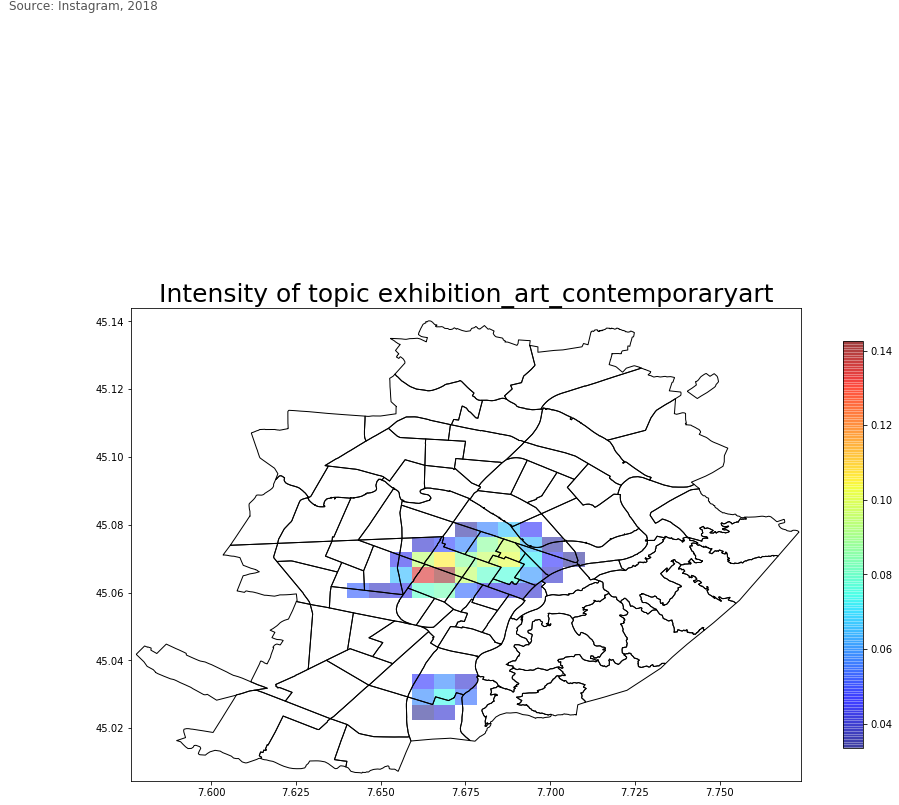

In [73]:
reload(IP)
colors='Blues'
for i in TV_toplot:
    TOP_list=[e for e in TOP1['data{}'.format(i)].tolist() if str(e) != 'nan']
    vmin, vmax= min(TOP_list),max(TOP_list)
    print vmin, vmax
    ax = df.to_crs(epsg=4326).plot(figsize=(15,15), linewidth=1, edgecolor='black', color=(0,0,0,0))
    IP.heatmap_2(TOP1[['data{}'.format(i),'geometry']],colors, smoothing=1)
    #ax = TOP1.plot(figsize=(15,15),column='data{}'.format(i), markersize=100, marker='s', ax=ax, cmap=colors,vmin=vmin,vmax=vmax, alpha=.5)
    
    ax.axis='off'
    # add a title
    ax.set_title('Intensity of topic {}'.format(tvectors[i]), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # create an annotation for the data source
    ax.annotate('Source: Instagram, 2018',xy=(0.01, 1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=colors, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []

    # add the colorbar to the figure
    #cbar = plt.colorbar(sm,shrink=.5)
    
    #IP.geo_hm_one_2(TOP1['data{}'.format(i)].tolist(),TOP1['geometry'].tolist(),colors,'try',ax=ax,save=False,folder='',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')
    #
    #plt.savefig(path+'Heatmaps/topic_dots_{}.pdf'.format(tvectors[i]))
    plt.savefig(path+'Heatmaps/topic_smoothed_otsu_{}.pdf'.format(tvectors[i]))
    
    plt.show()
    plt.close()

In [ ]:
4

0.000590892202962 0.500567319912
otsu threshold 0.32576659580013667


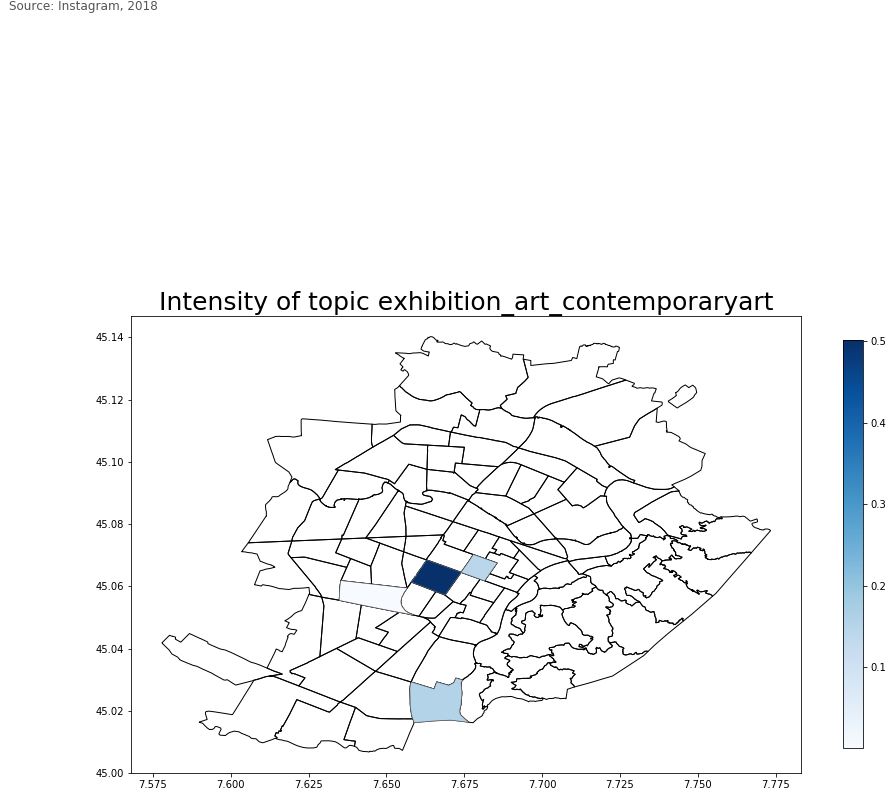

In [74]:
reload(IP)
colors='Blues'
for i in TV_toplot:
    TOP_list=[e for e in TOP1['data{}'.format(i)].tolist() if str(e) != 'nan']
    vmin, vmax= min(TOP_list),max(TOP_list)
    print vmin, vmax
    ax = df.to_crs(epsg=4326).plot(figsize=(15,15), linewidth=1, edgecolor='black', color=(0,0,0,0))
    #ax = TOP1.plot(figsize=(15,15),column='data{}'.format(i), markersize=100, ax=ax, cmap=colors,vmin=min(TOP1['data{}'.format(i)].tolist()),vmax=max(TOP1['data{}'.format(i)].tolist()), alpha=.5)
    IP.geo_hm_one_2(TOP1['data{}'.format(i)].tolist(),TOP1['geometry'].tolist(),colors,'try',ax=ax,save=False,folder='',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')

    ax.axis='off'
    # add a title
    ax.set_title('Intensity of topic {}'.format(tvectors[i]), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # create an annotation for the data source
    ax.annotate('Source: Instagram, 2018',xy=(0.01, 1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=colors, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range
    sm._A = []

    # add the colorbar to the figure
    cbar = plt.colorbar(sm,shrink=.5)
    plt.savefig(path+'Heatmaps/topic_ngh_otsu_{}.png'.format(tvectors[i]))
    plt.show()
    plt.close()

In [109]:
TOP1.head()

,data0,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16,points,geometry
"(45.0045, 7.60194240037)",NaN,NaN,NaN,0.001382,NaN,0.000612,NaN,NaN,NaN,0.011549,NaN,0.018626,0.000248,NaN,NaN,NaN,0.000318,POINT (7.601942400366751 45.00449999999999),POINT (7.601942400366751 45.00449999999999)
"(45.0045, 7.62105876852)",0.005881,NaN,NaN,0.002002,NaN,NaN,NaN,NaN,NaN,0.048948,0.006053,0.034050,0.001761,NaN,NaN,NaN,NaN,POINT (7.6210587685152 45.00449999999999),POINT (7.6210587685152 45.00449999999999)
"(45.0045, 7.64654725938)",NaN,0.000903,NaN,NaN,0.000187,0.000030,NaN,0.000653,NaN,NaN,0.001368,0.000082,0.000445,NaN,0.000158,NaN,0.000971,POINT (7.646547259379799 45.00449999999999),POINT (7.646547259379799 45.00449999999999)
"(45.0045, 7.6529193821)",0.009778,NaN,NaN,NaN,NaN,0.000546,0.002204,NaN,NaN,NaN,NaN,0.060748,0.001430,NaN,0.021767,NaN,NaN,POINT (7.652919382095949 45.00449999999999),POINT (7.652919382095949 45.00449999999999)
"(45.0045, 7.65929150481)",NaN,NaN,NaN,0.000496,NaN,0.003171,0.003028,NaN,NaN,NaN,NaN,0.007185,0.001602,NaN,0.000174,NaN,NaN,POINT (7.659291504812099 45.00449999999999),POINT (7.659291504812099 45.00449999999999)


In [137]:
str(type(TOP1['geometry'].tolist()[0]))=='shapely.geometry.point.Point'

False

In [143]:
A=pkl.load(open('PKL_files/results/NTF_2401_17/A.pkl', "rb"))
Grid=pkl.load(open('PKL_files/results/NTF_2401_17/Grid.pkl', "rb"))

os.mkdir('trial_geo/')

In [11]:
import Instaplot as IP

In [17]:
os.listdir('.')

['Lagrange_Progetto',
 'Instalib.py',
 '.git',
 'ncp.py',
 'boom.pdf',
 'carta_sintesi_geo',
 'trial_geoboom.pdf',
 'matlab_export',
 'Instaplot.pyc',
 'TorInstagram_Git.ipynb',
 'questions_words.txt',
 'Untitled.ipynb',
 'Results',
 'Figures',
 'models',
 'PKL_files',
 'Instalib.pyc',
 'ncp.pyc',
 'posts_per_month',
 'trial_geo',
 'Instaplot.py',
 'Torino_data',
 '.ipynb_checkpoints',
 'Marseille_data',
 'Word2Vec_Instagram.ipynb',
 'Plotter.ipynb']

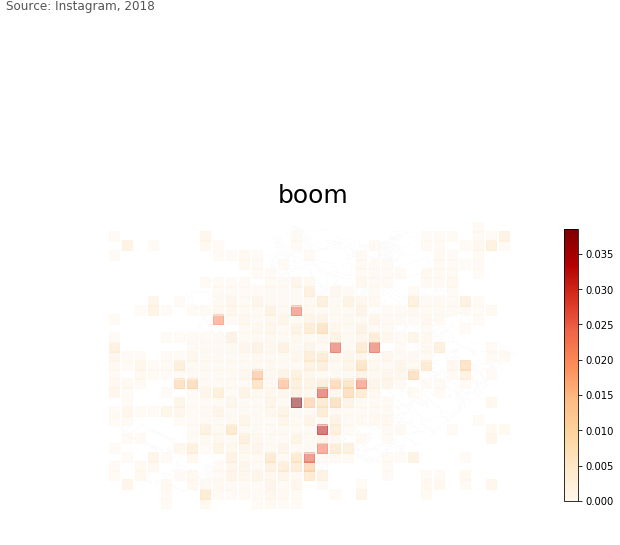

file saved trial_geo/boom


In [20]:
reload(IP)
IP.geo_plot_one(A.T[0],Grid,'OrRd','boom',save=True,folder='trial_geo/')

In [111]:
import numpy as np
from scipy import ndimage
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6

def heatmap(d, smoothing=1.3, cmap='RdPu'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    print len(set(x)), len(set(y))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=(len(set(x))-1, len(set(y))-1))
    print heatmap.shape
    extent = [min(yedges), max(yedges), max(xedges), min(xedges)]
    print extent
    heatmap = ndimage.filters.gaussian_filter(heatmap, smoothing, mode='nearest')
    
    plt.imshow(heatmap, extent=extent, cmap=cmap,alpha=.5)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()
    print (len(set(y)),len(set(x)))

In [72]:
A=np.zeros((3, 3))

In [75]:
A[2,2]=1
print A

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]


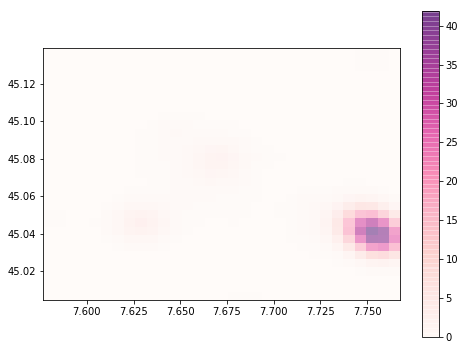

(31, 31)


In [82]:
heatmap_2(TOP1[['data16','geometry']], smoothing=1.5)

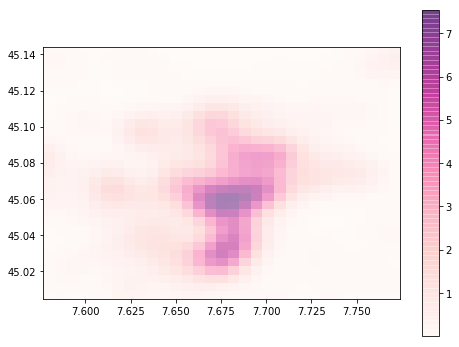

(31, 31)
[0.00010064914701929075, 0.008836932539914098, 0.0007407317080512625, 0.0]


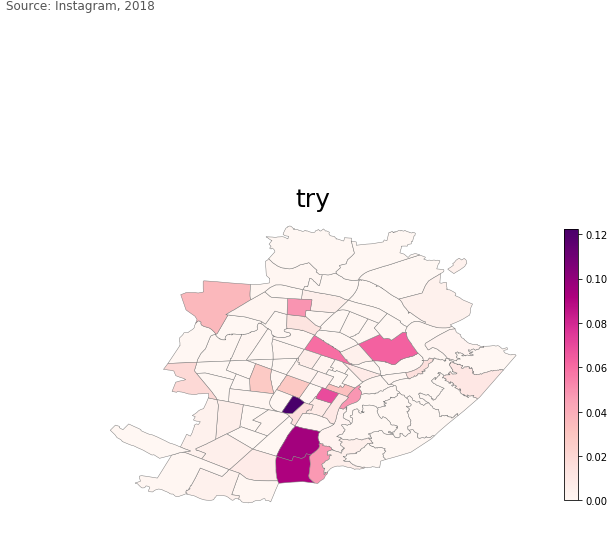

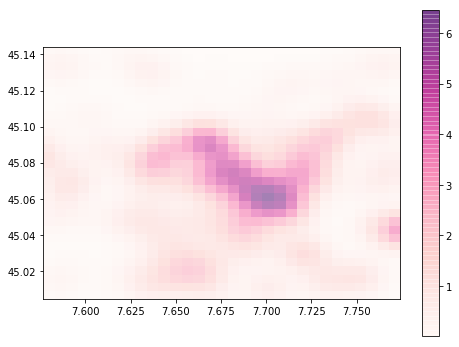

(31, 31)
[0.008379615174173674, 0.006590825698176048, 0.0, 0.00013944381746029244]


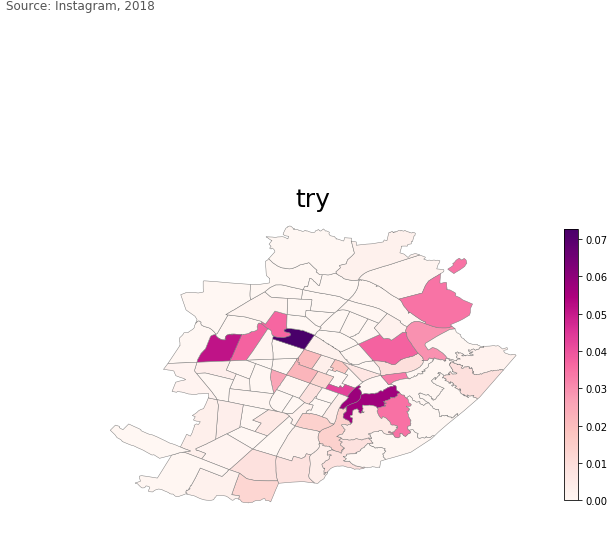

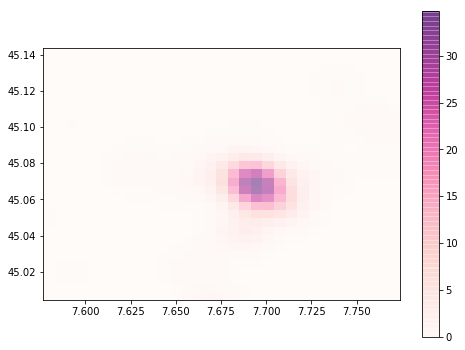

(31, 31)
[4.383603152109521e-06, 0.00221549038271525, 0.0, 8.050802494927832e-06]


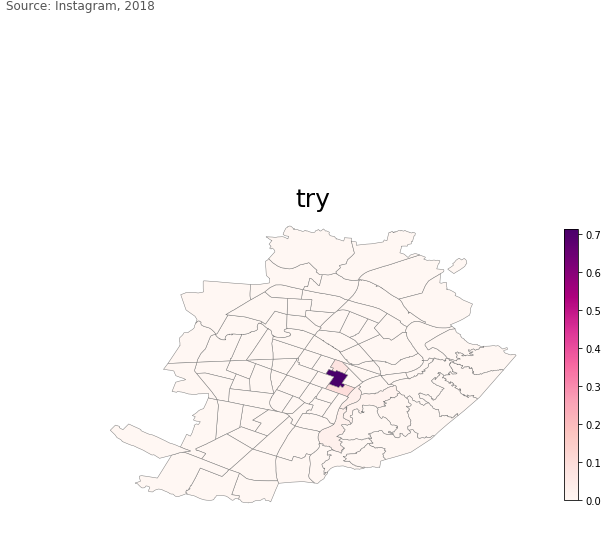

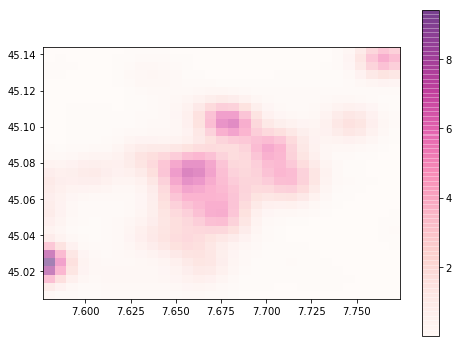

(31, 31)


KeyboardInterrupt: 

In [156]:
reload(IP)
colors='RdPu'
for i in xrange(5):
    vmin, vmax= min(TOP1['data{}'.format(i)].tolist()),max(TOP1['data{}'.format(i)].tolist())
    heatmap_2(TOP1[['data{}'.format(i),'geometry']], smoothing=1.5)
    IP.geo_hm_one(TOP1['data{}'.format(i)].tolist(),TOP1['geometry'].tolist(),colors,'try',save=False,folder='',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')
    
    plt.show()
    plt.close()